In [127]:
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
%matplotlib inline

In [129]:

# The data shows chemical information of wines created from three different plants.
# The data information files didn't specify what the plants were, just that they were different.

column_names = (
    "Plant used",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
)

wine_data = pd.read_csv('wine.data', names=column_names)
wine_data.head(5)

,Plant used,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


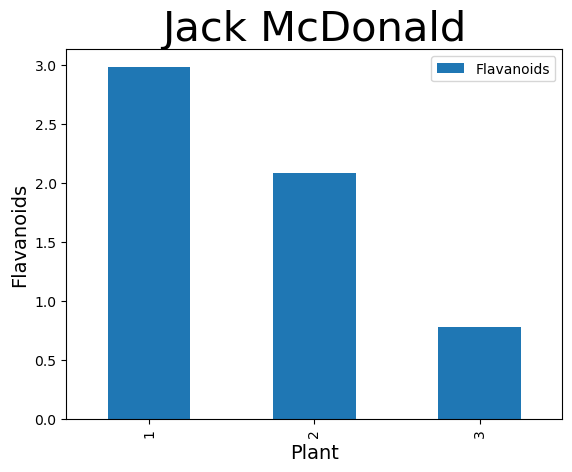

In [130]:

# Finding the average amount of magnesium for each type of plant

plant1 = wine_data[wine_data['Plant used'] == 1]
plant2 = wine_data[wine_data['Plant used'] == 2]
plant3 = wine_data[wine_data['Plant used'] == 3]

plant1_avg_flavanoids = plant1["Flavanoids"].mean()
plant2_avg_flavanoids = plant2["Flavanoids"].mean()
plant3_avg_flavanoids = plant3["Flavanoids"].mean()

bar_graph_df = pd.DataFrame({ 
    'Plant': [1, 2, 3], 
    'Flavanoids': [plant1_avg_flavanoids, plant2_avg_flavanoids, plant3_avg_flavanoids]
})

bar_graph_df.plot(x="Plant", y="Flavanoids", kind="bar")
plt.xlabel("Plant", fontsize=14)
plt.ylabel("Flavanoids", fontsize=14)
plt.title('Jack McDonald', fontsize=30)
plt.savefig("jack_bar_graph.png")
plt.show()

Plant 1 has the most flavanoids.
Plant 3 has the least flavanoids.

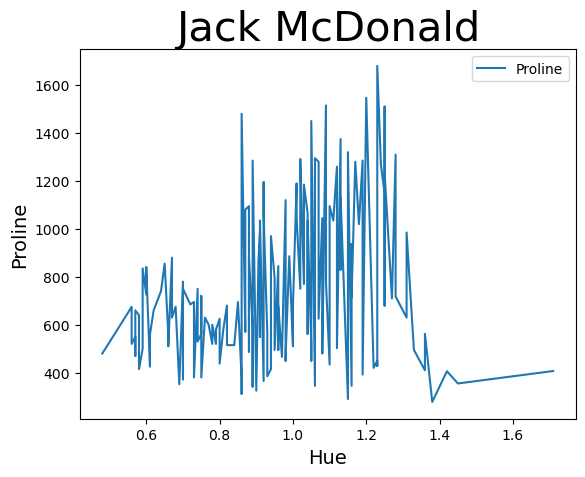

In [132]:

# Comparing the hues vs the amount of proline 

hues_and_proline = wine_data[["Hue", "Proline"]]
sorted_hues_and_proline = hues_and_proline.sort_values(by="Hue")

sorted_hues_and_proline.plot(x="Hue", y="Proline", kind="line")
plt.xlabel("Hue", fontsize=14)
plt.ylabel("Proline", fontsize=14)
plt.title("Jack McDonald", fontsize=30)
plt.savefig("jack_line_graph.png")
plt.show()

Wines with lower hues seem to have less variation in ash.

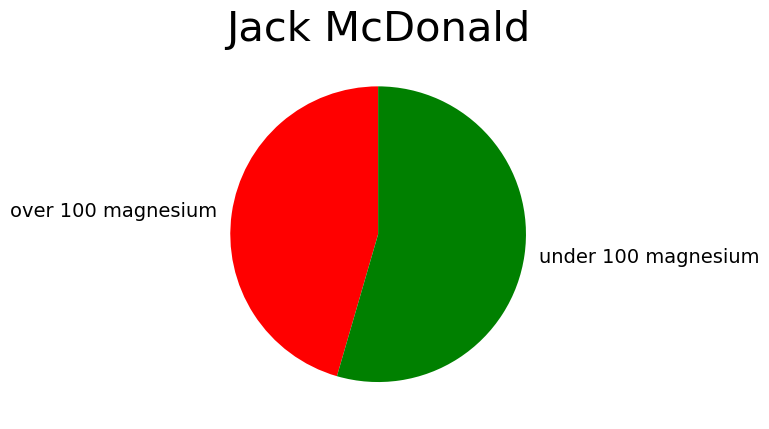

In [134]:

# Finding out how much of the wine has less than 100 magnesium

less_than_100_magnesium = len(wine_data[wine_data["Magnesium"] < 100])

plt.pie(
    [len(wine_data) - less_than_100_magnesium, less_than_100_magnesium],
    labels=["over 100 magnesium", "under 100 magnesium"],
    colors=["red", "green"],
    startangle=90,
    textprops={'fontsize': 14}
)
plt.title("Jack McDonald", fontsize=30)
plt.savefig("jack_pie_chart.png")
plt.show()


Slightly over half of the wines have less than 100 magnesium.

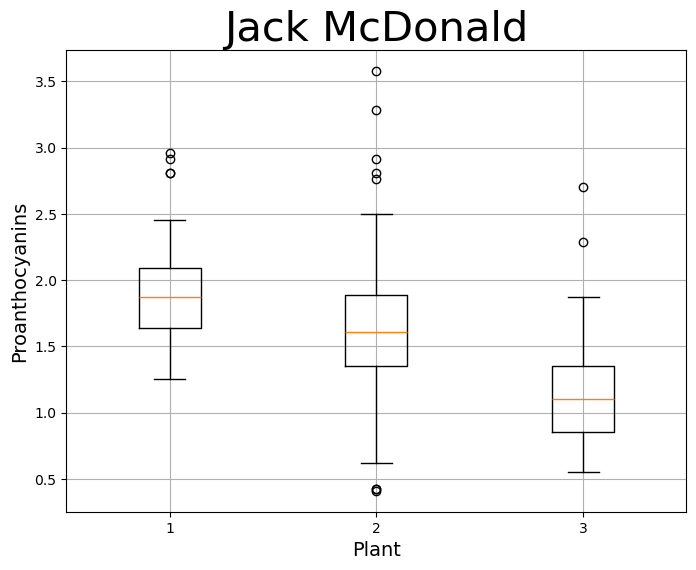

In [136]:

# Finding the amounts of proanthocyanins for each type of plant

plants = wine_data["Plant used"].unique()

box_plot_data = [wine_data[wine_data["Plant used"] == plant]["Proanthocyanins"] for plant in plants]

plt.figure(figsize=(8, 6))
plt.boxplot(box_plot_data, tick_labels=plants)
plt.xlabel("Plant", fontsize=14)
plt.ylabel("Proanthocyanins", fontsize=14)
plt.title("Jack McDonald", fontsize=30)
plt.grid()
plt.savefig("jack_box_chart.png")
plt.show()


Plant 1 has the most proanthocyanins on average.
Plant 3 has the least proanthocyanins on average.
Plant 2 has the widest range of proanthocyanins.